# TSF Task # 2 - To Explore Supervised Machine Learning

Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs.It infers a function from labeled training data consisting of a set of training examples.In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples

## Linear Regression Model

In this regression task we will predict the percentage of marks that a student is expected to score based on the number of hours they have studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
stu_data = pd.read_csv(url)
print("Data imported successfully")
# Printing the data
stu_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


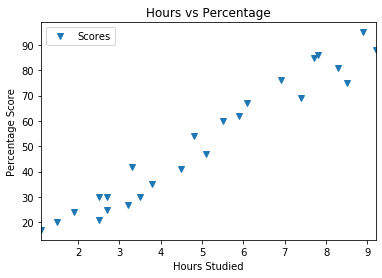

In [3]:
# Plotting the distribution of scores
stu_data.plot(x='Hours', y='Scores',style='v')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

#### Preparing the data:

Divide the data into "attributes" (inputs) and "labels" (outputs).And split this data into training and test sets by using Scikit-Learn's built-in train_test_split() method.

In [4]:
X = stu_data.iloc[:, :-1].values  
y = stu_data.iloc[:, 1].values  

In [5]:
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


#### Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

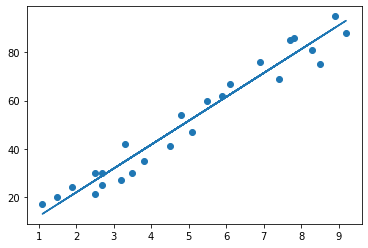

In [7]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#### Making Predictions

In [8]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
# Comparing Actual vs Predicted Values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


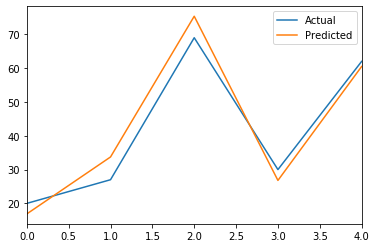

In [10]:
# Plotting Actual vs Predicted Values
df.plot();

Now we will predict the scores of a student who studies 9.25 hrs a day.

In [11]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


#### Evaluating the model


The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [12]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred)) 
print('Training Accuracy: {} %'.format(regressor.score(X_train, y_train)*100)) 
print('Testing Accuracy: {} %'.format(regressor.score(X_test, y_pred)*100)) 

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Training Accuracy: 95.15510725211553 %
Testing Accuracy: 100.0 %
